## Introduction
This notebook is a guideline to connect and download dataset from Kaggle platform for **GDSC AI Challenge**  (https://www.kaggle.com/c/gdsc-ai-challenge). \\
You can reuse this notebook as a template for your convenience during the competition. \\
Follow the steps listed below to make your first submission.

Note: Please make a duplication of this notebook in your Drive and use your copied version instead. (**File > Save a copy in Drive**). 

## Install Kaggle API

In order to connect and load the dataset from Kaggle competition to Colab Notebook, you need to first install the Kaggle API. (Detailed document can be found in https://github.com/Kaggle/kaggle-api)

In [1]:
# install the newest version of Kaggle API
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=4913b12f2773204c980d4e819e3eb54d61edb4baaa7e7193da38d7e6ed72aaaa
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


## Get API Credentials
1. To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com. Then go to the 'Account' tab of your user profile and select 'Create API Token'. This will trigger the download of kaggle.json, a file containing your API credentials.
2. Upload the kaggle.json file to your Colab session (remember to save this file somewhere safe as you will need to re-upload it again when your Colab session restarts).
3. Paste and run the following code to your notebook to setup the Kaggle API in your Colab session.

In [2]:
# create .kaggle folder in the root folder
! mkdir ~/.kaggle
# copy the kaggle.json file that have been updated to the .kaggle folder
! cp kaggle.json ~/.kaggle/kaggle.json
# remove the kaggle.json in the current directory
! rm kaggle.json
# for security to make sure only you can access the .json credential file
! chmod 600 ~/.kaggle/kaggle.json

## Download Dataset from Kaggle Competition
Run the following code to download the dataset from our competition (GDSC AI Challenge). Make sure that your account has been registered to the competition.

In [3]:
! kaggle competitions download -c gdsc-ai-challenge
! unzip gdsc-ai-challenge.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/55.png      
  inflating: train/train/550.png     
  inflating: train/train/5500.png    
  inflating: train/train/5501.png    
  inflating: train/train/5502.png    
  inflating: train/train/5503.png    
  inflating: train/train/5504.png    
  inflating: train/train/5505.png    
  inflating: train/train/5506.png    
  inflating: train/train/5507.png    
  inflating: train/train/5508.png    
  inflating: train/train/5509.png    
  inflating: train/train/551.png     
  inflating: train/train/5510.png    
  inflating: train/train/5511.png    
  inflating: train/train/5512.png    
  inflating: train/train/5513.png    
  inflating: train/train/5514.png    
  inflating: train/train/5515.png    
  inflating: train/train/5516.png    
  inflating: train/train/5517.png    
  inflating: train/train/5518.png    
  inflating: train/train/5519.png    
  inflating: train/train/552.png     
  inflating: train/train/5520.png    

After you have run the above commands, all the necessary files have been loaded to your Colab session. You can check it out from **Files -> content**

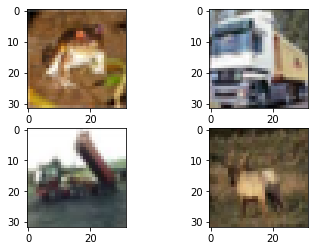

In [4]:
# let's plot some train images
import matplotlib.pyplot as plt
for i in range(1,5):
  img = plt.imread(f'./train/train/{i}.png')
  plt.subplot(2,2,i)
  plt.imshow(img)

## Reading data from the competition

Read the training images from directory ./train/train and the labels from trainLabels.csv

In [5]:
# Reading the data
import pandas as pd
import numpy as np
training_csv = pd.read_csv('trainLabels.csv')

mappings, training_labels = np.unique(training_csv['label'].to_numpy(copy=True), return_inverse=True)
training_labels = training_labels.reshape(-1, 1)

training_images = np.array([plt.imread(f'./train/train/{i + 1}.png') for i in range(0, 50000)])
testing_images  = np.array([plt.imread(f'./test/test/{i + 1}.png')   for i in range(0, 20000)])


## Model Building: You can start define and train your model here and ignore every other code blocks

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout

In [7]:
from keras.utils import np_utils
training_images = training_images.astype('float32')
testing_images = testing_images.astype('float32')
                                       
mean = np.mean(training_images,axis=(0,1,2,3))
std = np.std(training_images,axis=(0,1,2,3))
training_images = (training_images-mean)/(std+1e-7)
testing_images = (testing_images-mean)/(std+1e-7)

training_labels = np_utils.to_categorical(training_labels, 10)

In [8]:
x_train, x_val, y_train, y_val = train_test_split(training_images, training_labels, test_size = 0.2)

In [9]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

In [10]:
datagen.fit(x_train)
datagen.fit(x_val)

In [11]:
train_set = datagen.flow(x_train, y_train, batch_size = 64)
val_set = datagen.flow(x_val, y_val, batch_size = 64)

In [12]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.summary()

219070464/219055592 [==============================] - 2s 0us/step
Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)  

In [13]:
for layer in base_model.layers:
  layer.trainable = False

In [14]:
from keras.models import Sequential
model = Sequential()
model.add(layers.UpSampling2D((7,7)))
model.add(base_model)
model.add(Flatten())

In [15]:
weight_decay = 1e-4

In [18]:
model.add(Dense(2048, activation = 'elu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())

model.add(Dense(1024, activation = 'elu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

In [30]:
opt = tf.keras.optimizers.SGD(learning_rate=.001, momentum=.9, decay=1e-6,nesterov=False)
lrr= ReduceLROnPlateau(monitor='val_accuracy', 
                       factor=.01,
                       patience=3, 
                       min_lr=1e-5)
checkpoint = ModelCheckpoint(filepath='model.h5', monitor='val_loss', mode='min', save_best_only=True, save_weights_only=True)

In [31]:
model.compile(
    optimizer = opt,
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
    )

In [32]:
model.fit(train_set, epochs = 5, validation_data = val_set, callbacks = [lrr,checkpoint])

Epoch 1/5
625/625 [==============================] - 597s 933ms/step - loss: 0.7157 - accuracy: 0.9276 - val_loss: 0.9472 - val_accuracy: 0.8589 - lr: 0.0010
Epoch 2/5
625/625 [==============================] - 578s 925ms/step - loss: 0.7116 - accuracy: 0.9304 - val_loss: 0.9398 - val_accuracy: 0.8613 - lr: 0.0010
Epoch 3/5
625/625 [==============================] - 576s 921ms/step - loss: 0.7016 - accuracy: 0.9313 - val_loss: 0.9403 - val_accuracy: 0.8610 - lr: 0.0010
Epoch 4/5
625/625 [==============================] - 576s 922ms/step - loss: 0.6923 - accuracy: 0.9356 - val_loss: 0.9435 - val_accuracy: 0.8628 - lr: 0.0010
Epoch 5/5
625/625 [==============================] - 578s 926ms/step - loss: 0.6875 - accuracy: 0.9374 - val_loss: 0.9269 - val_accuracy: 0.8670 - lr: 0.0010


## Making Prediction and Submit

In [33]:
# predict the result
prediction = model.predict(testing_images)

Let's create a csv file for sample submission

The submission file needs to have one header row and exactly 20,000 rows for each images in the test set. Each row has two fields: 


*   id: id of the image in test set
*   label: The label that your model classifies for that image.

In [34]:
output = pd.DataFrame({
    'label': [mappings[np.argmax(p)] for p in prediction]
})
output.index += 1
print(output)

            label
1      automobile
2        airplane
3             cat
4           truck
5           horse
...           ...
19996         cat
19997        ship
19998        deer
19999    airplane
20000         cat

[20000 rows x 1 columns]


In [35]:
# write the output Dataframe to a csv file. This file will be stored on your Colab engine
output.to_csv('submission.csv', index=True, index_label='id')

The last step is to call the Kaggle API to submit your csv file

In [36]:
! kaggle competitions submit -c gdsc-ai-challenge -f submission.csv -m "Hello, this is my last submission"

100% 224k/224k [00:01<00:00, 146kB/s]
Successfully submitted to GDSC AI CHALLENGE

Congratulations! You have finished your first submission to **GDSC AI CHALLENGE**. \\
Now you can navigate back to Kaggle platform and check your submission.

In [37]:
model.save_weights(filepath='weight')

In [38]:
model.load_weights('weight')